## Electrical consumption

In this notebook we extract the electrical data and we merge it into the twitter and weather dataframe

In [8]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

We shall import the LMD data from November and December and concat it.

In [9]:
df_LMD_nov = pd.read_csv('../data/raw/SET-LMD-nov-2013.csv')
df_LMD_dec = pd.read_csv('../data/raw/SET-LMD-dec-2013.csv')
df_LMD = pd.concat([df_LMD_nov, df_LMD_dec], ignore_index=True)

In [10]:
df_LMD.isna().sum()

LINEID    0
TIME      0
VALUE     0
dtype: int64

In [11]:
df_CSD = pd.read_csv('../data/raw/SET-CSD.csv')

In [12]:
df_CSD

,SQUAREID,LINEID,NR_SITES
0,155,DG1031221,4
1,272,DG1031221,72
2,273,DG1031221,21
3,276,DG1003117,34
4,277,DG1003117,3
...,...,...,...
2570,10983,DG1013504,5
2571,10984,DG1013504,2
2572,11097,DG1013503,1
2573,11098,DG1013503,6


In [13]:
#filtered_df = df_CSD[df_CSD['LINEID'] == 'DG1000023']

In [14]:
#filtered_df

In [15]:
df_grid = gpd.read_file('../data/raw/trentino-grid.geojson')

In [16]:
df_grid

,cellId,geometry
0,38,"POLYGON ((10.91462 45.68201, 10.92746 45.68179..."
1,39,"POLYGON ((10.92746 45.68179, 10.94029 45.68157..."
2,40,"POLYGON ((10.94029 45.68157, 10.95312 45.68136..."
3,154,"POLYGON ((10.90209 45.69122, 10.91493 45.69100..."
4,155,"POLYGON ((10.91493 45.69100, 10.92777 45.69079..."
...,...,...
6570,11336,"POLYGON ((11.80475 46.52767, 11.81777 46.52735..."
6571,11337,"POLYGON ((11.81777 46.52735, 11.83080 46.52703..."
6572,11452,"POLYGON ((11.79219 46.53698, 11.80521 46.53666..."
6573,11453,"POLYGON ((11.80521 46.53666, 11.81824 46.53634..."


In [17]:
df_twitter = pd.read_csv('../data/interim/twitter_weather.csv')
df_twitter = df_twitter.rename(columns={"geometry_x": "geometry"})
df_twitter = gpd.GeoDataFrame(df_twitter)

In [18]:
df_twitter

,date,time,timestamp_x,user,municipality.name,language,hour_blocks,geometry,station,elevation,timestamp_y,minTemperature,maxTemperature,precipitation,minWind,maxWind,geometry_y,temperature,wind
0,2013-11-01,00:04,1383260656,5fd4f31f75,Trento,it,0,POINT (11.13 46.07),T0129,312,1383260400,11.7,16.0,0.0,0.2,2.0,POINT (11.13565308 46.07185136),13.2,1@47
1,2013-11-01,00:01,1383260474,68c0e98182,Pinzolo,tl,0,POINT (10.83 46.23),T0071,905,1383260400,4.5,12.3,0.0,0.0,2.5,POINT (10.79582897 46.31340453),8.4,0.1@205
2,2013-11-01,00:43,1383262983,abe21fc052,Cavalese,en,30,POINT (11.46 46.29),T0367,958,1383260400,7.0,13.0,0.0,0.0,1.8,POINT (11.45171306 46.28478205),8.8,NaN
3,2013-11-01,00:38,1383262717,94d1efbbfd,Rovereto,it,30,POINT (11.04 45.89),T0147,203,1383260400,11.0,18.4,0.0,0.2,1.9,POINT (11.04378514 45.89643672),13.2,0.6@7
4,2013-11-01,00:45,1383263140,d261d03075,San Michele all'Adige,ru,45,POINT (11.12 46.2),T0408,204,1383260400,9.6,16.9,0.0,NaN,NaN,POINT (11.10461227 46.18722699),11.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931,2013-12-31,00:25,1388445948,826558e00e,Vigo di Fassa,it,15,POINT (11.68 46.42),T0096,1205,1388444400,-10.0,0.3,0.0,NaN,NaN,POINT (11.6645808 46.38363633),-7.8,NaN
27932,2013-12-29,13:12,1388319166,06e9b1cdff,Predazzo,it,1300,POINT (11.6 46.31),T0389,1000,1388271600,0.4,3.7,0.0,NaN,NaN,POINT (11.59824667 46.29784352),3.4,NaN
27933,2013-11-19,00:51,1384818699,e61ce711d3,Sant'Orsola Terme,it,45,POINT (11.3 46.11),T0139,925,1384815600,4.3,6.1,0.0,NaN,NaN,POINT (11.30223033 46.10709297),4.8,NaN
27934,2013-11-23,09:49,1385196576,e61ce711d3,Sant'Orsola Terme,it,945,POINT (11.3 46.11),T0139,925,1385161200,-1.6,2.6,0.0,NaN,NaN,POINT (11.30223033 46.10709297),0.8,NaN


In [19]:
# remake blocks of 10 minutes (column: hour_blocks)
minutes = df_twitter['time'].str.rsplit(':', n=1).str[1].astype(int)
minutes = (minutes // 10)*10
minutes = minutes.astype(str)
minutes = minutes.str.zfill(2)
#print(minutes)

hours = df_twitter['time'].str.rsplit(':', n=1).str[0]

df_twitter['hour_blocks'] = hours + ':' + minutes

In [20]:
df_twitter

,date,time,timestamp_x,user,municipality.name,language,hour_blocks,geometry,station,elevation,timestamp_y,minTemperature,maxTemperature,precipitation,minWind,maxWind,geometry_y,temperature,wind
0,2013-11-01,00:04,1383260656,5fd4f31f75,Trento,it,00:00,POINT (11.13 46.07),T0129,312,1383260400,11.7,16.0,0.0,0.2,2.0,POINT (11.13565308 46.07185136),13.2,1@47
1,2013-11-01,00:01,1383260474,68c0e98182,Pinzolo,tl,00:00,POINT (10.83 46.23),T0071,905,1383260400,4.5,12.3,0.0,0.0,2.5,POINT (10.79582897 46.31340453),8.4,0.1@205
2,2013-11-01,00:43,1383262983,abe21fc052,Cavalese,en,00:40,POINT (11.46 46.29),T0367,958,1383260400,7.0,13.0,0.0,0.0,1.8,POINT (11.45171306 46.28478205),8.8,NaN
3,2013-11-01,00:38,1383262717,94d1efbbfd,Rovereto,it,00:30,POINT (11.04 45.89),T0147,203,1383260400,11.0,18.4,0.0,0.2,1.9,POINT (11.04378514 45.89643672),13.2,0.6@7
4,2013-11-01,00:45,1383263140,d261d03075,San Michele all'Adige,ru,00:40,POINT (11.12 46.2),T0408,204,1383260400,9.6,16.9,0.0,NaN,NaN,POINT (11.10461227 46.18722699),11.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931,2013-12-31,00:25,1388445948,826558e00e,Vigo di Fassa,it,00:20,POINT (11.68 46.42),T0096,1205,1388444400,-10.0,0.3,0.0,NaN,NaN,POINT (11.6645808 46.38363633),-7.8,NaN
27932,2013-12-29,13:12,1388319166,06e9b1cdff,Predazzo,it,13:10,POINT (11.6 46.31),T0389,1000,1388271600,0.4,3.7,0.0,NaN,NaN,POINT (11.59824667 46.29784352),3.4,NaN
27933,2013-11-19,00:51,1384818699,e61ce711d3,Sant'Orsola Terme,it,00:50,POINT (11.3 46.11),T0139,925,1384815600,4.3,6.1,0.0,NaN,NaN,POINT (11.30223033 46.10709297),4.8,NaN
27934,2013-11-23,09:49,1385196576,e61ce711d3,Sant'Orsola Terme,it,09:40,POINT (11.3 46.11),T0139,925,1385161200,-1.6,2.6,0.0,NaN,NaN,POINT (11.30223033 46.10709297),0.8,NaN


In [21]:
df_twitter['geometry'] = df_twitter['geometry'].apply(wkt.loads)

In [22]:
df_twitter = gpd.GeoDataFrame(df_twitter)

In [23]:
df_twitter = df_twitter.set_crs('EPSG:4326')

Now it's time to merge the grid in the twitter df to associate each tweet with its corresponding grid cell

In [24]:
# merge df_tw and grid by space
df_merged = gpd.sjoin(df_twitter, df_grid, how='inner', predicate='within')

In [25]:
df_merged

,date,time,timestamp_x,user,municipality.name,language,hour_blocks,geometry,station,elevation,...,minTemperature,maxTemperature,precipitation,minWind,maxWind,geometry_y,temperature,wind,index_right,cellId
0,2013-11-01,00:04,1383260656,5fd4f31f75,Trento,it,00:00,POINT (11.13000 46.07000),T0129,312,...,11.7,16.0,0.0,0.2,2.0,POINT (11.13565308 46.07185136),13.2,1@47,2447,5201
1,2013-11-01,00:01,1383260474,68c0e98182,Pinzolo,tl,00:00,POINT (10.83000 46.23000),T0071,905,...,4.5,12.3,0.0,0.0,2.5,POINT (10.79582897 46.31340453),8.4,0.1@205,4152,7167
2,2013-11-01,00:43,1383262983,abe21fc052,Cavalese,en,00:40,POINT (11.46000 46.29000),T0367,958,...,7.0,13.0,0.0,0.0,1.8,POINT (11.45171306 46.28478205),8.8,NaN,4982,8151
3,2013-11-01,00:38,1383262717,94d1efbbfd,Rovereto,it,00:30,POINT (11.04000 45.89000),T0147,203,...,11.0,18.4,0.0,0.2,1.9,POINT (11.04378514 45.89643672),13.2,0.6@7,865,2855
4,2013-11-01,00:45,1383263140,d261d03075,San Michele all'Adige,ru,00:40,POINT (11.12000 46.20000),T0408,204,...,9.6,16.9,0.0,NaN,NaN,POINT (11.10461227 46.18722699),11.6,NaN,3847,6838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931,2013-12-31,00:25,1388445948,826558e00e,Vigo di Fassa,it,00:20,POINT (11.68000 46.42000),T0096,1205,...,-10.0,0.3,0.0,NaN,NaN,POINT (11.6645808 46.38363633),-7.8,NaN,6143,9922
27932,2013-12-29,13:12,1388319166,06e9b1cdff,Predazzo,it,13:10,POINT (11.60000 46.31000),T0389,1000,...,0.4,3.7,0.0,NaN,NaN,POINT (11.59824667 46.29784352),3.4,NaN,5253,8513
27933,2013-11-19,00:51,1384818699,e61ce711d3,Sant'Orsola Terme,it,00:50,POINT (11.30000 46.11000),T0139,925,...,4.3,6.1,0.0,NaN,NaN,POINT (11.30223033 46.10709297),4.8,NaN,2915,5799
27934,2013-11-23,09:49,1385196576,e61ce711d3,Sant'Orsola Terme,it,09:40,POINT (11.30000 46.11000),T0139,925,...,-1.6,2.6,0.0,NaN,NaN,POINT (11.30223033 46.10709297),0.8,NaN,2915,5799


In [26]:
df_merged = df_merged.drop('index_right', axis=1)

In [27]:
df_merged

,date,time,timestamp_x,user,municipality.name,language,hour_blocks,geometry,station,elevation,timestamp_y,minTemperature,maxTemperature,precipitation,minWind,maxWind,geometry_y,temperature,wind,cellId
0,2013-11-01,00:04,1383260656,5fd4f31f75,Trento,it,00:00,POINT (11.13000 46.07000),T0129,312,1383260400,11.7,16.0,0.0,0.2,2.0,POINT (11.13565308 46.07185136),13.2,1@47,5201
1,2013-11-01,00:01,1383260474,68c0e98182,Pinzolo,tl,00:00,POINT (10.83000 46.23000),T0071,905,1383260400,4.5,12.3,0.0,0.0,2.5,POINT (10.79582897 46.31340453),8.4,0.1@205,7167
2,2013-11-01,00:43,1383262983,abe21fc052,Cavalese,en,00:40,POINT (11.46000 46.29000),T0367,958,1383260400,7.0,13.0,0.0,0.0,1.8,POINT (11.45171306 46.28478205),8.8,NaN,8151
3,2013-11-01,00:38,1383262717,94d1efbbfd,Rovereto,it,00:30,POINT (11.04000 45.89000),T0147,203,1383260400,11.0,18.4,0.0,0.2,1.9,POINT (11.04378514 45.89643672),13.2,0.6@7,2855
4,2013-11-01,00:45,1383263140,d261d03075,San Michele all'Adige,ru,00:40,POINT (11.12000 46.20000),T0408,204,1383260400,9.6,16.9,0.0,NaN,NaN,POINT (11.10461227 46.18722699),11.6,NaN,6838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931,2013-12-31,00:25,1388445948,826558e00e,Vigo di Fassa,it,00:20,POINT (11.68000 46.42000),T0096,1205,1388444400,-10.0,0.3,0.0,NaN,NaN,POINT (11.6645808 46.38363633),-7.8,NaN,9922
27932,2013-12-29,13:12,1388319166,06e9b1cdff,Predazzo,it,13:10,POINT (11.60000 46.31000),T0389,1000,1388271600,0.4,3.7,0.0,NaN,NaN,POINT (11.59824667 46.29784352),3.4,NaN,8513
27933,2013-11-19,00:51,1384818699,e61ce711d3,Sant'Orsola Terme,it,00:50,POINT (11.30000 46.11000),T0139,925,1384815600,4.3,6.1,0.0,NaN,NaN,POINT (11.30223033 46.10709297),4.8,NaN,5799
27934,2013-11-23,09:49,1385196576,e61ce711d3,Sant'Orsola Terme,it,09:40,POINT (11.30000 46.11000),T0139,925,1385161200,-1.6,2.6,0.0,NaN,NaN,POINT (11.30223033 46.10709297),0.8,NaN,5799


And now let's add the total electrical consumption of each cell, which has to be yet calculated

WARNING!: each cell has multiple lines!

In [28]:
df_lines = df_CSD.groupby(['LINEID']).sum()

In [29]:
#df_lines['NR_SITES'].loc['DG1000023'] #check

In [30]:
df_lines = pd.merge(df_LMD, df_lines, on='LINEID', how='inner')

In [31]:
df_lines = df_lines.rename(columns={"NR_SITES": "TOT_SITES"})
df_lines = df_lines.drop('SQUAREID', axis=1)

In [32]:
df_lines

,LINEID,TIME,VALUE,TOT_SITES
0,DG1000420,2013-11-01 00:00,37.439999,2133
1,DG1000420,2013-11-01 00:10,37.439999,2133
2,DG1000420,2013-11-01 00:20,36.000000,2133
3,DG1000420,2013-11-01 00:30,35.279999,2133
4,DG1000420,2013-11-01 00:40,35.279999,2133
...,...,...,...,...
1615889,DG1056626,2013-12-31 23:10,79.574997,1667
1615890,DG1056626,2013-12-31 23:20,78.625000,1667
1615891,DG1056626,2013-12-31 23:30,77.025002,1667
1615892,DG1056626,2013-12-31 23:40,76.125000,1667


In [33]:
df_lines = pd.merge(df_lines, df_CSD, on='LINEID', how='left')

In [34]:
df_lines

,LINEID,TIME,VALUE,TOT_SITES,SQUAREID,NR_SITES
0,DG1000420,2013-11-01 00:00,37.439999,2133,4037,2
1,DG1000420,2013-11-01 00:00,37.439999,2133,4154,13
2,DG1000420,2013-11-01 00:00,37.439999,2133,4155,20
3,DG1000420,2013-11-01 00:00,37.439999,2133,4156,2
4,DG1000420,2013-11-01 00:00,37.439999,2133,4269,1
...,...,...,...,...,...,...
22227259,DG1056626,2013-12-31 23:50,75.775002,1667,8502,1
22227260,DG1056626,2013-12-31 23:50,75.775002,1667,8503,4
22227261,DG1056626,2013-12-31 23:50,75.775002,1667,8621,1
22227262,DG1056626,2013-12-31 23:50,75.775002,1667,8972,25


In [35]:
df_lines['tot_curr_cell'] = (df_lines['VALUE']/df_lines['TOT_SITES'])*df_lines['NR_SITES']

In [36]:
df_lines

,LINEID,TIME,VALUE,TOT_SITES,SQUAREID,NR_SITES,tot_curr_cell
0,DG1000420,2013-11-01 00:00,37.439999,2133,4037,2,0.035105
1,DG1000420,2013-11-01 00:00,37.439999,2133,4154,13,0.228186
2,DG1000420,2013-11-01 00:00,37.439999,2133,4155,20,0.351055
3,DG1000420,2013-11-01 00:00,37.439999,2133,4156,2,0.035105
4,DG1000420,2013-11-01 00:00,37.439999,2133,4269,1,0.017553
...,...,...,...,...,...,...,...
22227259,DG1056626,2013-12-31 23:50,75.775002,1667,8502,1,0.045456
22227260,DG1056626,2013-12-31 23:50,75.775002,1667,8503,4,0.181824
22227261,DG1056626,2013-12-31 23:50,75.775002,1667,8621,1,0.045456
22227262,DG1056626,2013-12-31 23:50,75.775002,1667,8972,25,1.136398


In [37]:
len(df_lines['SQUAREID'].unique()) #gives the number of cells

1984

In [38]:
df_lines = df_lines.sort_values(by=['SQUAREID'])

In [39]:
df_lines

,LINEID,TIME,VALUE,TOT_SITES,SQUAREID,NR_SITES,tot_curr_cell
21666994,DG1031221,2013-12-11 02:20,22.920000,1380,155,4,0.066435
10396998,DG1031221,2013-11-13 19:40,54.000000,1380,155,4,0.156522
10382324,DG1031221,2013-11-09 09:00,71.519997,1380,155,4,0.207304
10401897,DG1031221,2013-11-15 07:10,44.759998,1380,155,4,0.129739
10363165,DG1031221,2013-11-03 14:10,31.920000,1380,155,4,0.092522
...,...,...,...,...,...,...,...
20257967,DG1013503,2013-12-09 19:50,30.700001,443,11099,3,0.207901
9036047,DG1013503,2013-11-17 22:10,12.450000,443,11099,3,0.084312
20268357,DG1013503,2013-12-17 01:00,21.225000,443,11099,3,0.143736
20268247,DG1013503,2013-12-16 23:10,24.875000,443,11099,3,0.168454


In [40]:
df_grouped = df_lines.groupby(['SQUAREID', 'TIME'], as_index=False).agg({'tot_curr_cell': 'sum'})

In [41]:
df_grouped

,SQUAREID,TIME,tot_curr_cell
0,155,2013-11-01 00:00,0.101565
1,155,2013-11-01 00:10,0.086957
2,155,2013-11-01 00:20,0.093913
3,155,2013-11-01 00:30,0.089391
4,155,2013-11-01 00:40,0.088696
...,...,...,...
17423497,11099,2013-12-31 23:10,0.086851
17423498,11099,2013-12-31 23:20,0.082788
17423499,11099,2013-12-31 23:30,0.081941
17423500,11099,2013-12-31 23:40,0.077709


In [42]:
df_grouped['date'] = df_grouped['TIME'].str.split(' ', n=1).str[0]

In [43]:
df_grouped['hour_blocks'] = df_grouped['TIME'].str.split(' ', n=1).str[1]

In [44]:
df_grouped = df_grouped.drop('TIME', axis=1)

In [45]:
df_grouped

,SQUAREID,tot_curr_cell,date,hour_blocks
0,155,0.101565,2013-11-01,00:00
1,155,0.086957,2013-11-01,00:10
2,155,0.093913,2013-11-01,00:20
3,155,0.089391,2013-11-01,00:30
4,155,0.088696,2013-11-01,00:40
...,...,...,...,...
17423497,11099,0.086851,2013-12-31,23:10
17423498,11099,0.082788,2013-12-31,23:20
17423499,11099,0.081941,2013-12-31,23:30
17423500,11099,0.077709,2013-12-31,23:40


In [46]:
df_grouped[df_grouped['SQUAREID'] == 5799]

,SQUAREID,tot_curr_cell,date,hour_blocks


In [47]:
df_CSD[df_CSD['SQUAREID'] == 5799]

,SQUAREID,LINEID,NR_SITES


In [48]:
df_final = pd.merge(
    df_merged, 
    df_grouped, 
    left_on=['cellId', 'date', 'hour_blocks'], 
    right_on=['SQUAREID', 'date', 'hour_blocks'], 
    how='left')

In [49]:
df_final

,date,time,timestamp_x,user,municipality.name,language,hour_blocks,geometry,station,elevation,...,maxTemperature,precipitation,minWind,maxWind,geometry_y,temperature,wind,cellId,SQUAREID,tot_curr_cell
0,2013-11-01,00:04,1383260656,5fd4f31f75,Trento,it,00:00,POINT (11.13000 46.07000),T0129,312,...,16.0,0.0,0.2,2.0,POINT (11.13565308 46.07185136),13.2,1@47,5201,5201.0,90.971940
1,2013-11-01,00:01,1383260474,68c0e98182,Pinzolo,tl,00:00,POINT (10.83000 46.23000),T0071,905,...,12.3,0.0,0.0,2.5,POINT (10.79582897 46.31340453),8.4,0.1@205,7167,7167.0,1.784586
2,2013-11-01,00:43,1383262983,abe21fc052,Cavalese,en,00:40,POINT (11.46000 46.29000),T0367,958,...,13.0,0.0,0.0,1.8,POINT (11.45171306 46.28478205),8.8,NaN,8151,NaN,NaN
3,2013-11-01,00:38,1383262717,94d1efbbfd,Rovereto,it,00:30,POINT (11.04000 45.89000),T0147,203,...,18.4,0.0,0.2,1.9,POINT (11.04378514 45.89643672),13.2,0.6@7,2855,2855.0,47.591226
4,2013-11-01,00:45,1383263140,d261d03075,San Michele all'Adige,ru,00:40,POINT (11.12000 46.20000),T0408,204,...,16.9,0.0,NaN,NaN,POINT (11.10461227 46.18722699),11.6,NaN,6838,6838.0,0.100372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931,2013-12-31,00:25,1388445948,826558e00e,Vigo di Fassa,it,00:20,POINT (11.68000 46.42000),T0096,1205,...,0.3,0.0,NaN,NaN,POINT (11.6645808 46.38363633),-7.8,NaN,9922,NaN,NaN
27932,2013-12-29,13:12,1388319166,06e9b1cdff,Predazzo,it,13:10,POINT (11.60000 46.31000),T0389,1000,...,3.7,0.0,NaN,NaN,POINT (11.59824667 46.29784352),3.4,NaN,8513,NaN,NaN
27933,2013-11-19,00:51,1384818699,e61ce711d3,Sant'Orsola Terme,it,00:50,POINT (11.30000 46.11000),T0139,925,...,6.1,0.0,NaN,NaN,POINT (11.30223033 46.10709297),4.8,NaN,5799,NaN,NaN
27934,2013-11-23,09:49,1385196576,e61ce711d3,Sant'Orsola Terme,it,09:40,POINT (11.30000 46.11000),T0139,925,...,2.6,0.0,NaN,NaN,POINT (11.30223033 46.10709297),0.8,NaN,5799,NaN,NaN


In [57]:
df_final['precipitation'].isna().sum()

27

In [51]:
df_final['elevation'].isna().sum()

0

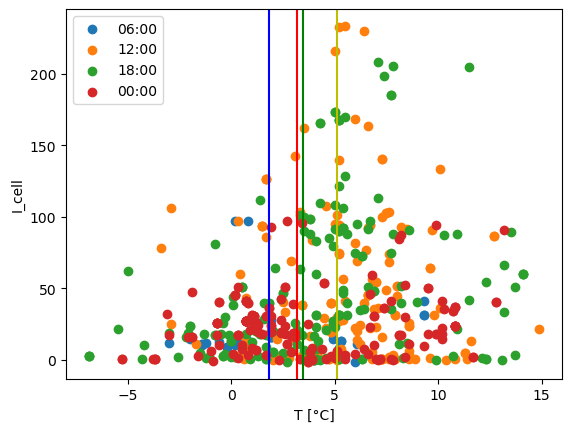

In [52]:
hour = '06:00'
df_h = df_final[df_final['hour_blocks'] == hour]
plt.scatter(df_h['temperature'], df_h['tot_curr_cell'], label=hour)
plt.axvline(df_h['temperature'].mean(), color='b')

hour = '12:00'
df_h = df_final[df_final['hour_blocks'] == hour]
plt.scatter(df_h['temperature'], df_h['tot_curr_cell'], label=hour)
plt.axvline(df_h['temperature'].mean(), color='y')

hour = '18:00'
df_h = df_final[df_final['hour_blocks'] == hour]
plt.scatter(df_h['temperature'], df_h['tot_curr_cell'], label=hour)
plt.axvline(df_h['temperature'].mean(), color='g')

hour = '00:00'
df_h = df_final[df_final['hour_blocks'] == hour]
plt.scatter(df_h['temperature'], df_h['tot_curr_cell'], label=hour)
plt.axvline(df_h['temperature'].mean(), color='r')

plt.xlabel('T [°C]')
plt.ylabel('I_cell')
plt.legend()

In [54]:
df_final['tot_curr_cell'] = df_final['tot_curr_cell'].fillna(0)

In [58]:
df_final = df_final.drop('SQUAREID', axis=1)

In [59]:
df_final

,date,time,timestamp_x,user,municipality.name,language,hour_blocks,geometry,station,elevation,...,minTemperature,maxTemperature,precipitation,minWind,maxWind,geometry_y,temperature,wind,cellId,tot_curr_cell
0,2013-11-01,00:04,1383260656,5fd4f31f75,Trento,it,00:00,POINT (11.13000 46.07000),T0129,312,...,11.7,16.0,0.0,0.2,2.0,POINT (11.13565308 46.07185136),13.2,1@47,5201,90.971940
1,2013-11-01,00:01,1383260474,68c0e98182,Pinzolo,tl,00:00,POINT (10.83000 46.23000),T0071,905,...,4.5,12.3,0.0,0.0,2.5,POINT (10.79582897 46.31340453),8.4,0.1@205,7167,1.784586
2,2013-11-01,00:43,1383262983,abe21fc052,Cavalese,en,00:40,POINT (11.46000 46.29000),T0367,958,...,7.0,13.0,0.0,0.0,1.8,POINT (11.45171306 46.28478205),8.8,NaN,8151,0.000000
3,2013-11-01,00:38,1383262717,94d1efbbfd,Rovereto,it,00:30,POINT (11.04000 45.89000),T0147,203,...,11.0,18.4,0.0,0.2,1.9,POINT (11.04378514 45.89643672),13.2,0.6@7,2855,47.591226
4,2013-11-01,00:45,1383263140,d261d03075,San Michele all'Adige,ru,00:40,POINT (11.12000 46.20000),T0408,204,...,9.6,16.9,0.0,NaN,NaN,POINT (11.10461227 46.18722699),11.6,NaN,6838,0.100372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931,2013-12-31,00:25,1388445948,826558e00e,Vigo di Fassa,it,00:20,POINT (11.68000 46.42000),T0096,1205,...,-10.0,0.3,0.0,NaN,NaN,POINT (11.6645808 46.38363633),-7.8,NaN,9922,0.000000
27932,2013-12-29,13:12,1388319166,06e9b1cdff,Predazzo,it,13:10,POINT (11.60000 46.31000),T0389,1000,...,0.4,3.7,0.0,NaN,NaN,POINT (11.59824667 46.29784352),3.4,NaN,8513,0.000000
27933,2013-11-19,00:51,1384818699,e61ce711d3,Sant'Orsola Terme,it,00:50,POINT (11.30000 46.11000),T0139,925,...,4.3,6.1,0.0,NaN,NaN,POINT (11.30223033 46.10709297),4.8,NaN,5799,0.000000
27934,2013-11-23,09:49,1385196576,e61ce711d3,Sant'Orsola Terme,it,09:40,POINT (11.30000 46.11000),T0139,925,...,-1.6,2.6,0.0,NaN,NaN,POINT (11.30223033 46.10709297),0.8,NaN,5799,0.000000


In [60]:
df_sites = df_CSD.groupby(['SQUAREID'], as_index=False).agg({'NR_SITES': 'sum'})

In [61]:
df_sites

,SQUAREID,NR_SITES
0,155,4
1,272,72
2,273,21
3,276,34
4,277,3
...,...,...
2015,10983,5
2016,10984,2
2017,11097,1
2018,11098,6


In [69]:
df_final = pd.merge(df_final, df_sites, left_on='cellId', right_on='SQUAREID', how='left')

KeyError: "['SQUAREID'] not found in axis"

In [71]:
df_final = df_final.drop('SQUAREID', axis=1)

In [72]:
df_final['NR_SITES'] = df_final['NR_SITES'].fillna(0)

In [73]:
df_final

,date,time,timestamp_x,user,municipality.name,language,hour_blocks,geometry,station,elevation,...,maxTemperature,precipitation,minWind,maxWind,geometry_y,temperature,wind,cellId,tot_curr_cell,NR_SITES
0,2013-11-01,00:04,1383260656,5fd4f31f75,Trento,it,00:00,POINT (11.13000 46.07000),T0129,312,...,16.0,0.0,0.2,2.0,POINT (11.13565308 46.07185136),13.2,1@47,5201,90.971940,1288.0
1,2013-11-01,00:01,1383260474,68c0e98182,Pinzolo,tl,00:00,POINT (10.83000 46.23000),T0071,905,...,12.3,0.0,0.0,2.5,POINT (10.79582897 46.31340453),8.4,0.1@205,7167,1.784586,24.0
2,2013-11-01,00:43,1383262983,abe21fc052,Cavalese,en,00:40,POINT (11.46000 46.29000),T0367,958,...,13.0,0.0,0.0,1.8,POINT (11.45171306 46.28478205),8.8,NaN,8151,0.000000,0.0
3,2013-11-01,00:38,1383262717,94d1efbbfd,Rovereto,it,00:30,POINT (11.04000 45.89000),T0147,203,...,18.4,0.0,0.2,1.9,POINT (11.04378514 45.89643672),13.2,0.6@7,2855,47.591226,995.0
4,2013-11-01,00:45,1383263140,d261d03075,San Michele all'Adige,ru,00:40,POINT (11.12000 46.20000),T0408,204,...,16.9,0.0,NaN,NaN,POINT (11.10461227 46.18722699),11.6,NaN,6838,0.100372,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931,2013-12-31,00:25,1388445948,826558e00e,Vigo di Fassa,it,00:20,POINT (11.68000 46.42000),T0096,1205,...,0.3,0.0,NaN,NaN,POINT (11.6645808 46.38363633),-7.8,NaN,9922,0.000000,0.0
27932,2013-12-29,13:12,1388319166,06e9b1cdff,Predazzo,it,13:10,POINT (11.60000 46.31000),T0389,1000,...,3.7,0.0,NaN,NaN,POINT (11.59824667 46.29784352),3.4,NaN,8513,0.000000,0.0
27933,2013-11-19,00:51,1384818699,e61ce711d3,Sant'Orsola Terme,it,00:50,POINT (11.30000 46.11000),T0139,925,...,6.1,0.0,NaN,NaN,POINT (11.30223033 46.10709297),4.8,NaN,5799,0.000000,0.0
27934,2013-11-23,09:49,1385196576,e61ce711d3,Sant'Orsola Terme,it,09:40,POINT (11.30000 46.11000),T0139,925,...,2.6,0.0,NaN,NaN,POINT (11.30223033 46.10709297),0.8,NaN,5799,0.000000,0.0


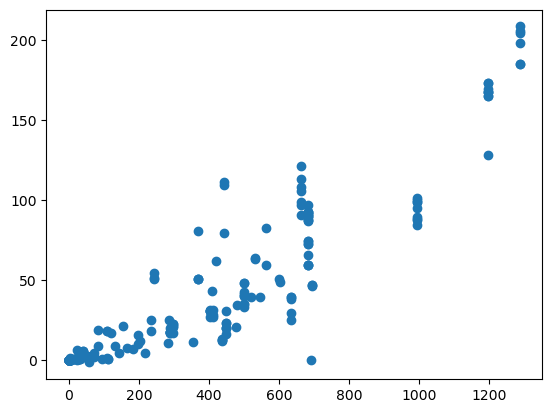

In [84]:
hour = '18:00'
df_h = df_final[df_final['hour_blocks'] == hour]
plt.scatter(df_h['NR_SITES'], df_h['tot_curr_cell'])

In [87]:
df_final['curr_site'] = (df_final['tot_curr_cell']/df_final['NR_SITES']).fillna(0)

In [88]:
df_final

,date,time,timestamp_x,user,municipality.name,language,hour_blocks,geometry,station,elevation,...,precipitation,minWind,maxWind,geometry_y,temperature,wind,cellId,tot_curr_cell,NR_SITES,curr_site
0,2013-11-01,00:04,1383260656,5fd4f31f75,Trento,it,00:00,POINT (11.13000 46.07000),T0129,312,...,0.0,0.2,2.0,POINT (11.13565308 46.07185136),13.2,1@47,5201,90.971940,1288.0,0.070630
1,2013-11-01,00:01,1383260474,68c0e98182,Pinzolo,tl,00:00,POINT (10.83000 46.23000),T0071,905,...,0.0,0.0,2.5,POINT (10.79582897 46.31340453),8.4,0.1@205,7167,1.784586,24.0,0.074358
2,2013-11-01,00:43,1383262983,abe21fc052,Cavalese,en,00:40,POINT (11.46000 46.29000),T0367,958,...,0.0,0.0,1.8,POINT (11.45171306 46.28478205),8.8,NaN,8151,0.000000,0.0,0.000000
3,2013-11-01,00:38,1383262717,94d1efbbfd,Rovereto,it,00:30,POINT (11.04000 45.89000),T0147,203,...,0.0,0.2,1.9,POINT (11.04378514 45.89643672),13.2,0.6@7,2855,47.591226,995.0,0.047830
4,2013-11-01,00:45,1383263140,d261d03075,San Michele all'Adige,ru,00:40,POINT (11.12000 46.20000),T0408,204,...,0.0,NaN,NaN,POINT (11.10461227 46.18722699),11.6,NaN,6838,0.100372,4.0,0.025093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27931,2013-12-31,00:25,1388445948,826558e00e,Vigo di Fassa,it,00:20,POINT (11.68000 46.42000),T0096,1205,...,0.0,NaN,NaN,POINT (11.6645808 46.38363633),-7.8,NaN,9922,0.000000,0.0,0.000000
27932,2013-12-29,13:12,1388319166,06e9b1cdff,Predazzo,it,13:10,POINT (11.60000 46.31000),T0389,1000,...,0.0,NaN,NaN,POINT (11.59824667 46.29784352),3.4,NaN,8513,0.000000,0.0,0.000000
27933,2013-11-19,00:51,1384818699,e61ce711d3,Sant'Orsola Terme,it,00:50,POINT (11.30000 46.11000),T0139,925,...,0.0,NaN,NaN,POINT (11.30223033 46.10709297),4.8,NaN,5799,0.000000,0.0,0.000000
27934,2013-11-23,09:49,1385196576,e61ce711d3,Sant'Orsola Terme,it,09:40,POINT (11.30000 46.11000),T0139,925,...,0.0,NaN,NaN,POINT (11.30223033 46.10709297),0.8,NaN,5799,0.000000,0.0,0.000000


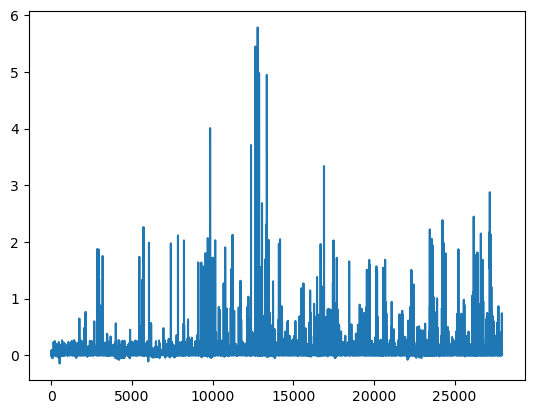

In [93]:
plt.plot(df_final['curr_site'])

In [94]:
df_final.columns

Index(['date', 'time', 'timestamp_x', 'user', 'municipality.name', 'language',
       'hour_blocks', 'geometry', 'station', 'elevation', 'timestamp_y',
       'minTemperature', 'maxTemperature', 'precipitation', 'minWind',
       'maxWind', 'geometry_y', 'temperature', 'wind', 'cellId',
       'tot_curr_cell', 'NR_SITES', 'curr_site'],
      dtype='object')

In [99]:
df_final['maxWind'].isna().sum()

9959

In [100]:
df_final.to_csv('../data/interim/twitter_weather_electrical.csv', index=False)